# Check the best topology for v10 version



## Import all necessary packages:

In [1]:
from saphyra.utils import crossval_table
from Gaugi import load
import os, re, sys, glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import collections
%matplotlib inline
%config InlineBackend.figure_format='retina'

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence


## Create the tuning file dict:

In [2]:
def create_op_dict(op):
    d = {
              op+'_pd_ref'    : "reference/"+op+"_cutbased/pd_ref#0",
              op+'_fa_ref'    : "reference/"+op+"_cutbased/fa_ref#0",
              op+'_sp_ref'    : "reference/"+op+"_cutbased/sp_ref",
              op+'_pd_val'    : "reference/"+op+"_cutbased/pd_val#0",
              op+'_fa_val'    : "reference/"+op+"_cutbased/fa_val#0",
              op+'_sp_val'    : "reference/"+op+"_cutbased/sp_val",
              op+'_pd_op'     : "reference/"+op+"_cutbased/pd_op#0",
              op+'_fa_op'     : "reference/"+op+"_cutbased/fa_op#0",
              op+'_sp_op'     : "reference/"+op+"_cutbased/sp_op",
            
              # Counts
              op+'_pd_ref_passed'    : "reference/"+op+"_cutbased/pd_ref#1",
              op+'_fa_ref_passed'    : "reference/"+op+"_cutbased/fa_ref#1",
              op+'_pd_ref_total'     : "reference/"+op+"_cutbased/pd_ref#2",
              op+'_fa_ref_total'     : "reference/"+op+"_cutbased/fa_ref#2",   
              op+'_pd_val_passed'    : "reference/"+op+"_cutbased/pd_val#1",
              op+'_fa_val_passed'    : "reference/"+op+"_cutbased/fa_val#1",
              op+'_pd_val_total'     : "reference/"+op+"_cutbased/pd_val#2",
              op+'_fa_val_total'     : "reference/"+op+"_cutbased/fa_val#2",  
              op+'_pd_op_passed'     : "reference/"+op+"_cutbased/pd_op#1",
              op+'_fa_op_passed'     : "reference/"+op+"_cutbased/fa_op#1",
              op+'_pd_op_total'      : "reference/"+op+"_cutbased/pd_op#2",
              op+'_fa_op_total'      : "reference/"+op+"_cutbased/fa_op#2",
    } 
    return d

tuned_info = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
  
              } )

tuned_info.update(create_op_dict('tight'))
tuned_info.update(create_op_dict('medium'))
tuned_info.update(create_op_dict('loose'))
tuned_info.update(create_op_dict('vloose'))

## Open all tuning files:

In [19]:
cv = crossval_table( tuned_info )
basepath='/Volumes/castor/tuning_data/Zee/fastcalo/v10/topo_studies/'
cv.fill( basepath+'user.jodafons.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97.v10a_*.r1/*/*.pic.gz', 'v10')
#!ls ../tuning_data/*

I1110 12:00:36.125594 140736093057920 macros.py:23] Reading file for v10 tag from /Volumes/castor/tuning_data/Zee/fastcalo/v10/topo_studies/user.jodafons.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97.v10a_*.r1/*/*.pic.gz
I1110 12:00:36.126801 140736093057920 macros.py:23] There are 320 files for this task...
I1110 12:00:36.128086 140736093057920 macros.py:23] Filling the table... 
I1110 12:00:44.895817 140736093057920 macros.py:23] End of fill step, a pandas DataFrame was created...


2020-11-10 12:00:36,125 | Py.crossval_table                       INFO Reading file for v10 tag from /Volumes/castor/tuning_data/Zee/fastcalo/v10/topo_studies/user.jodafons.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97.v10a_*.r1/*/*.pic.gz
2020-11-10 12:00:36,126 | Py.crossval_table                       INFO There are 320 files for this task...
2020-11-10 12:00:36,128 | Py.crossval_table                       INFO Filling the table... 
2020-11-10 12:00:44,895 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...


Let's keep only the best inits for each sort, configuration and eta/phi bin. To calculate this we must choose an evaluation method to keep the max value in each configuration. Here, we will get the best inists looking for the max SP value for each one.

In [20]:
best_inits = cv.filter_inits("max_sp_val")
best_inits.head()

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,tuned_idx,max_sp_val,max_sp_pd_val,...,vloose_pd_ref_total,vloose_fa_ref_total,vloose_pd_val_passed,vloose_fa_val_passed,vloose_pd_val_total,vloose_fa_val_total,vloose_pd_op_passed,vloose_fa_op_passed,vloose_pd_op_total,vloose_fa_op_total
1,v10,0,0,0,0,1,/Volumes/castor/tuning_data/Zee/fastcalo/v10/t...,0,0.980992,0.987587,...,232819,187639,23015,524,23282,18764,230152,5877,232819,187639
72,v10,0,0,0,1,0,/Volumes/castor/tuning_data/Zee/fastcalo/v10/t...,0,0.980584,0.985268,...,232819,187639,23015,547,23282,18764,230153,5427,232819,187639
94,v10,0,0,0,2,0,/Volumes/castor/tuning_data/Zee/fastcalo/v10/t...,0,0.978461,0.983850,...,232819,187639,23015,649,23282,18764,230153,5274,232819,187639
127,v10,0,0,0,3,1,/Volumes/castor/tuning_data/Zee/fastcalo/v10/t...,0,0.979275,0.986986,...,232819,187639,23013,584,23282,18764,230153,5447,232819,187639
149,v10,0,0,0,4,1,/Volumes/castor/tuning_data/Zee/fastcalo/v10/t...,0,0.979114,0.985697,...,232819,187639,23015,598,23282,18764,230153,6112,232819,187639


## Plot the evolution for each configuration

Here, each configurations means the number of neurons in the hidden layer.

Number index for each topology:
- 0 : 4->8->8->1 with k=2;
- 1 : 8->16->16->1 with k=2;
- 2 : 16->32->32->1 with k=2;
- 3 : 32->64->64->1 with k=2;
- 4 : 4->8->8->1 with k=4;
- 5 : 8->16->16->1 with k=4;
- 6 : 16->32->32->1 with k=4;
- 7 : 32->64->64->1 with k=4;
- 8 : 4->8->8->1 with k=7;
- 9 : 8->16->16->1 with k=7;
- 10: 16->32->32->1 with k=7;
- 11: 32->64->64->1 with k=7;
- 12: 4->8->8->1 with k=10;
- 13: 8->16->16->1 with k=10;
- 14: 16->32->32->1 with k=10;
- 15: 32->64->64->1 with k=10;


saving sp_evolution_per_config_et0_eta0.pdf...


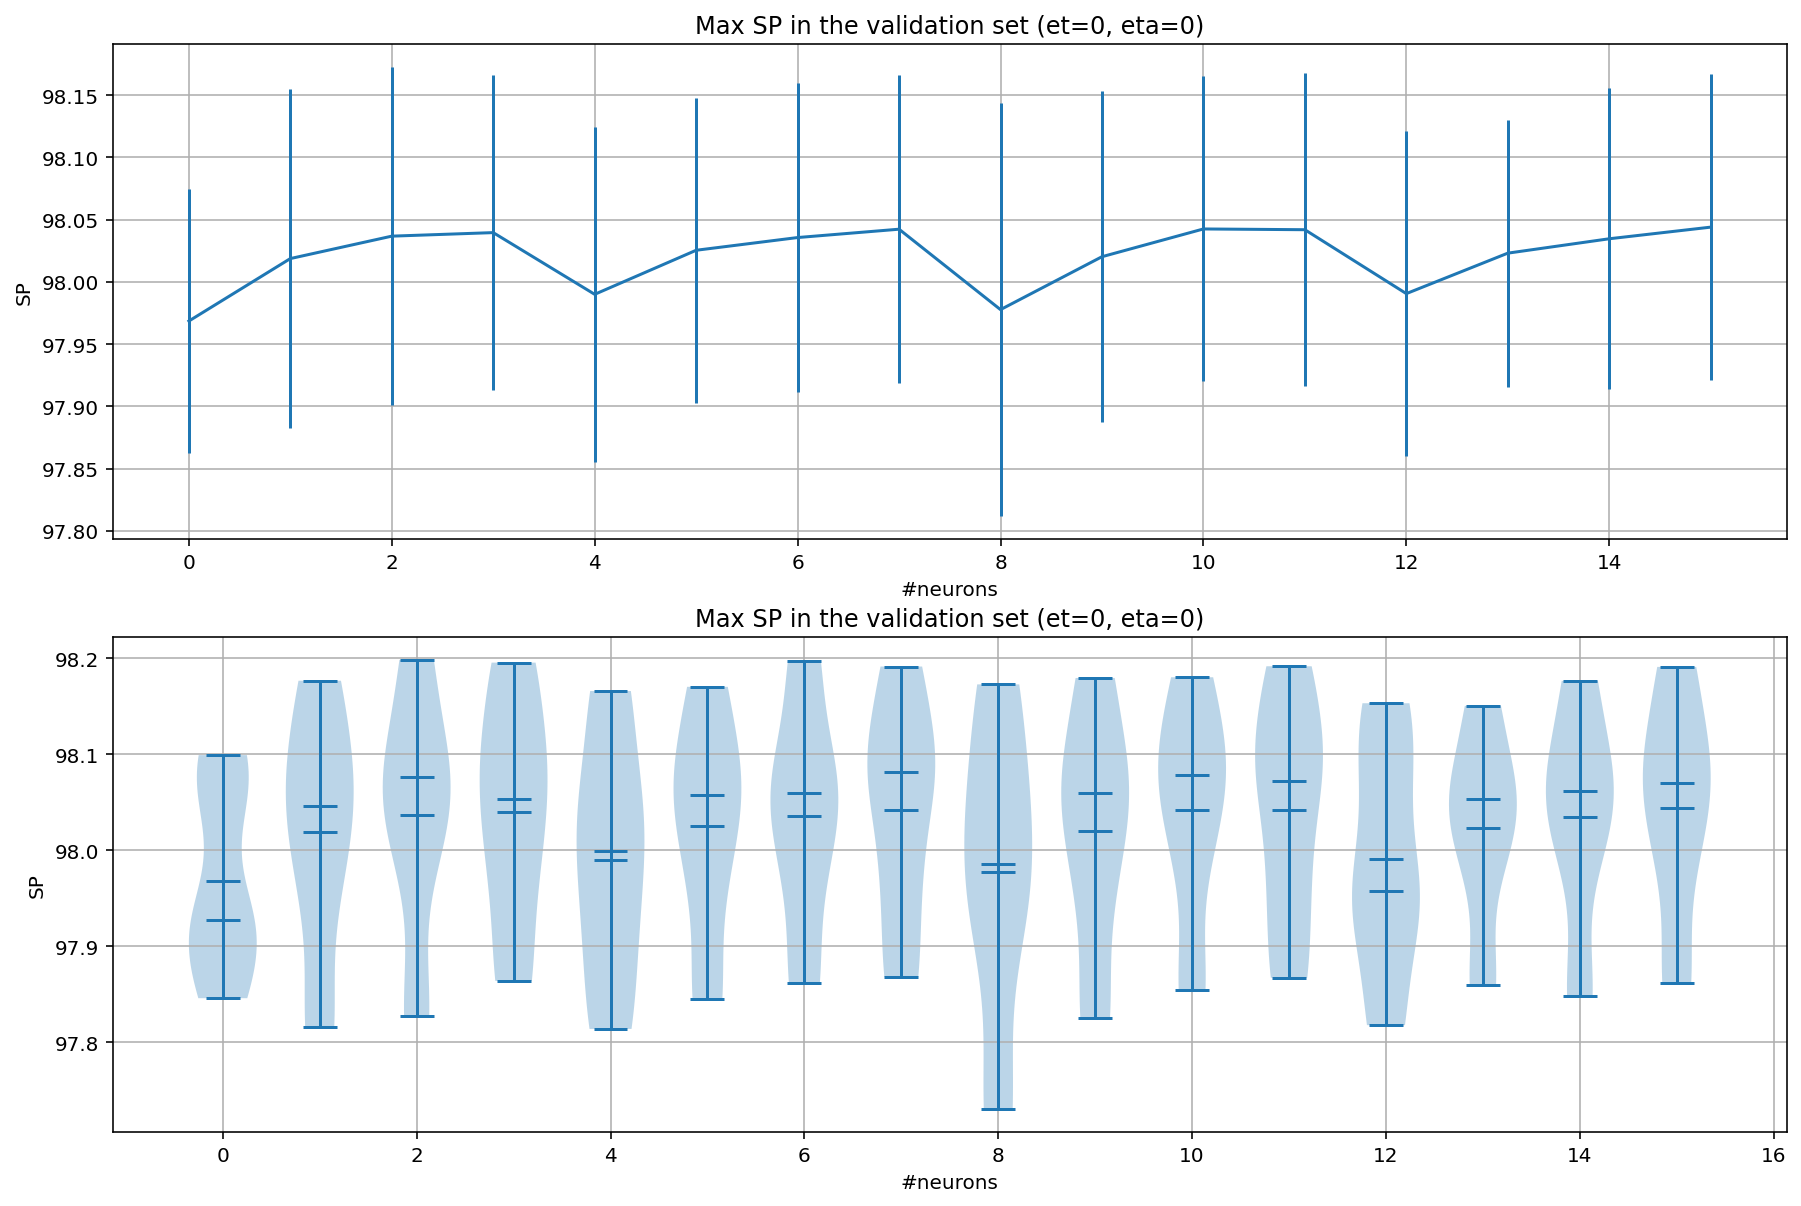

saving sp_evolution_per_config_et2_eta0.pdf...


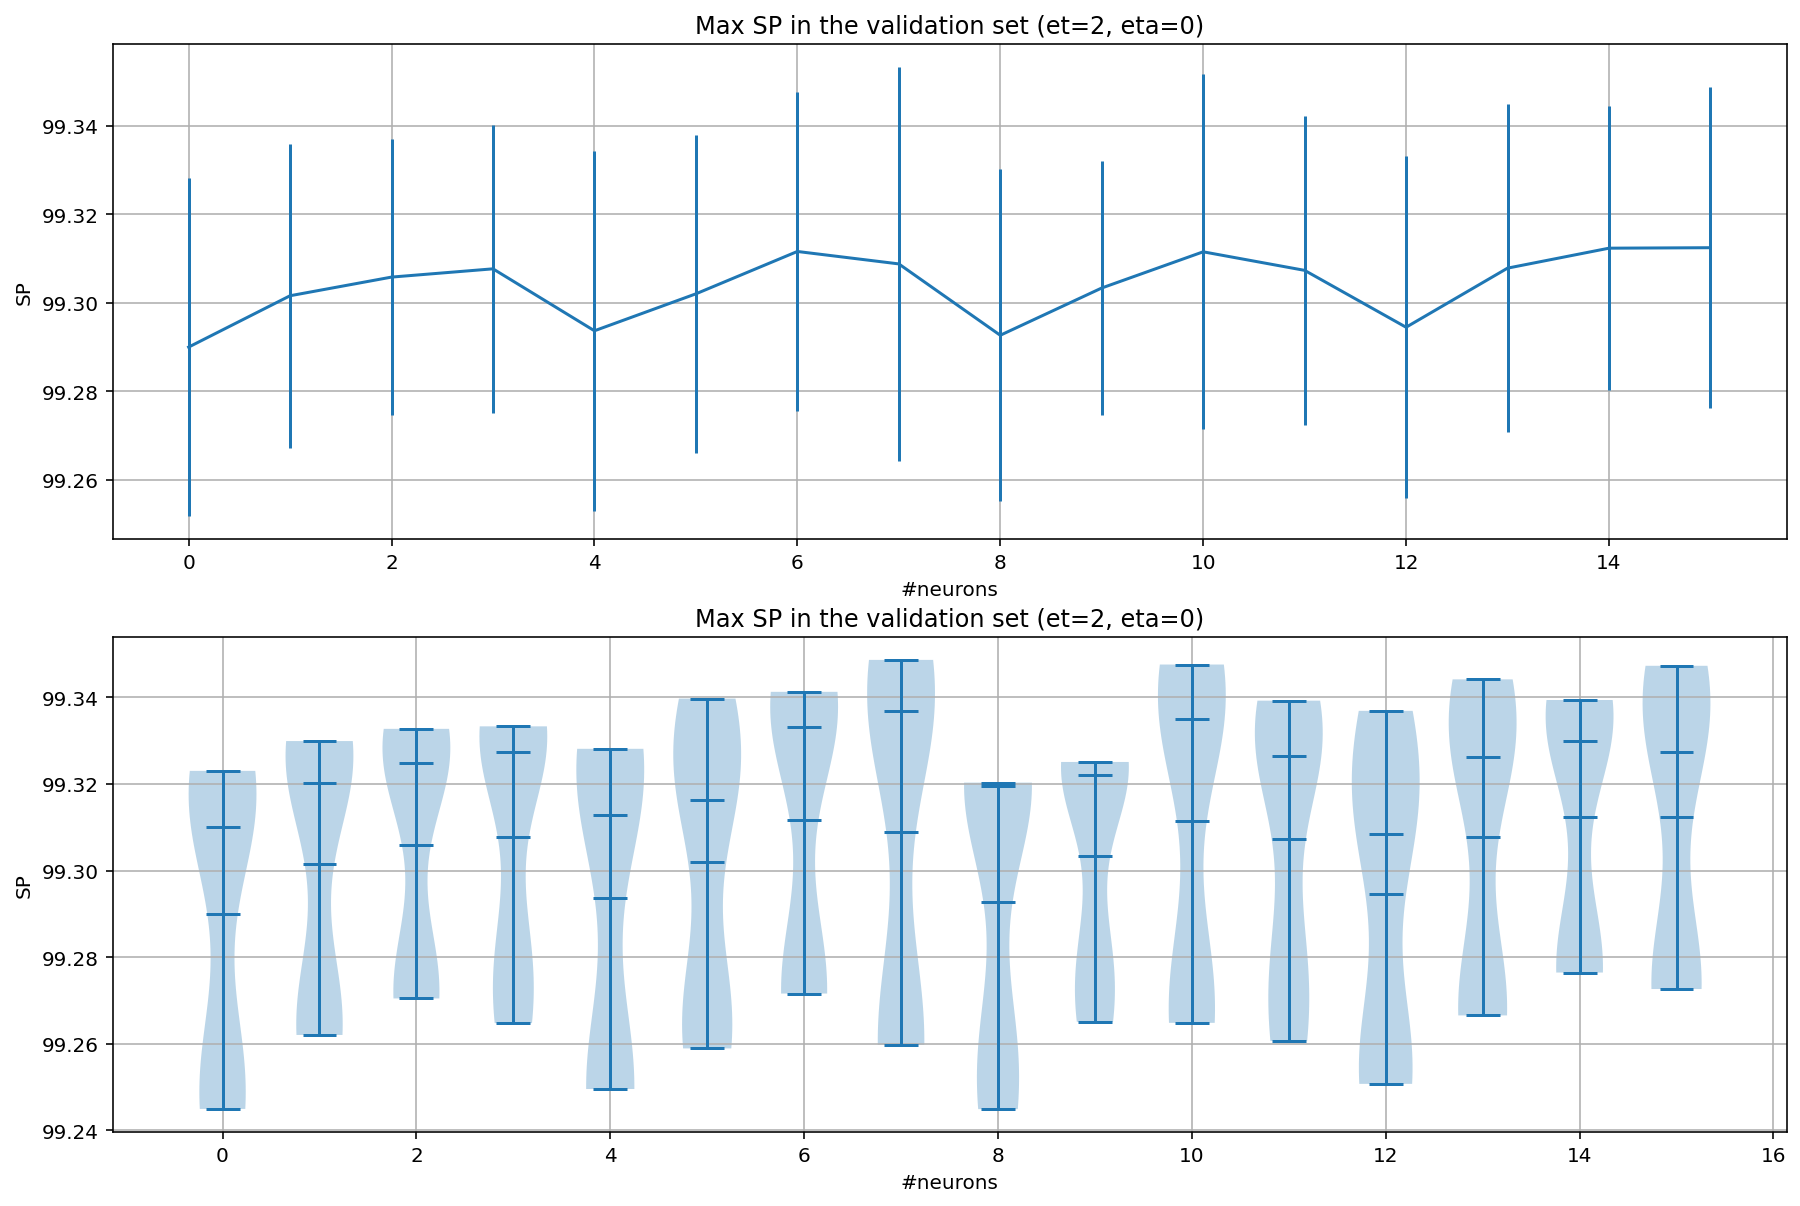

In [22]:
def plot_evolution( t , et_bin, eta_bin , output, display=False):

    model_idx = t.model_idx.unique()
    sp_val_mean = []; sp_val_std = []
    data = np.zeros( (5,len(model_idx)) )
    for idx in model_idx:
        table = t.loc[ (t.model_idx==idx) & (t.et_bin==et_bin) & (t.eta_bin==eta_bin)]    
        sp_val_mean.append( table['max_sp_val'].mean() * 100)
        sp_val_std.append( table['max_sp_val'].std() * 100)
        data[:,idx] = table['max_sp_val'].values *100
    
    fig, ax = plt.subplots(2,1, figsize=(15,10))
    ax[0].errorbar(model_idx, sp_val_mean, yerr=sp_val_std, label='Max SP (validation)')
    ax[0].set(xlabel='#neurons', ylabel='SP',title='Max SP in the validation set (et=%d, eta=%d)'%(et_bin,eta_bin))
    ax[0].grid()



    ax[1].violinplot(data, model_idx, points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
    ax[1].set(xlabel='#neurons', ylabel='SP',title='Max SP in the validation set (et=%d, eta=%d)'%(et_bin,eta_bin))
    ax[1].grid()
    print('saving %s...'%output)
    plt.savefig(output)
    if display:
        plt.show()      
    else:
        plt.close(fig)

        
for et_bin in best_inits.et_bin.unique():
    for eta_bin in best_inits.eta_bin.unique():
        plot_evolution(best_inits, et_bin, eta_bin, 'sp_evolution_per_config_et%d_eta%d.pdf'%(et_bin,eta_bin),display=True)